In [101]:
# import libraries
import sklearn as sk
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder

# for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import graphviz

# for KNN
from sklearn.neighbors import KNeighborsClassifier

# for random forest
from sklearn.ensemble import RandomForestClassifier

# for logistic regression
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [145]:
# read dataset and look at general structure
fraud = pd.read_csv("fraudTest.csv")

print(fraud.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

Most common categories:
 gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: category, dtype: int64 

Most common categories of fraudulent transactions:
 shopping_net      506
grocery_pos       485
misc_net          267
shopping_pos      213
gas_transport     154
misc_pos           72
personal_care      70
home               67
kids_pets          65
entertainment      59
food_dining        54
health_fitness     52
grocery_net        41
travel             40
Name: category, dtype: int64


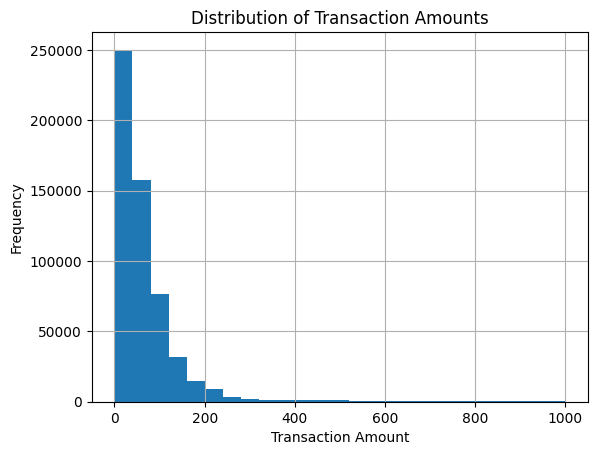

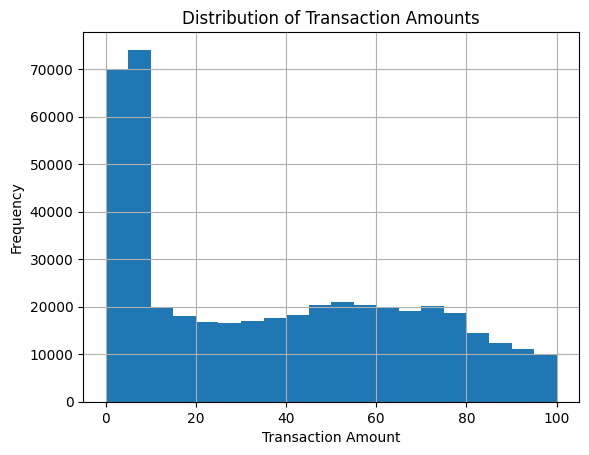

In [146]:
# DATA EXPLORATION
# create histogram of amt
fraud.hist(column="amt",bins=25, range=[0,1000])
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Transaction Amounts")
plt.show

# print(fraud['amt'].max())
# print(fraud['amt'].median())

# change range to exclude outliers and provide better view
fraud.hist(column="amt",bins=20, range=[0,100])
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Transaction Amounts")
plt.show

category_counts = fraud['category'].value_counts()
print("Most common categories:\n", category_counts, "\n")

found_fraud = fraud[fraud['is_fraud']==1]
category_counts2 = found_fraud['category'].value_counts()
print("Most common categories of fraudulent transactions:\n", category_counts2)

In [104]:
# change categorical variables to numeric when possible

# create mapping dictionary for gender
mapping = {'M': 0, 'F': 1}

# Apply the mapping to the 'gender' column
fraud['gender'] = fraud['gender'].map(mapping)

# Convert dob to integer format 'yyyymmdd'
fraud['dob'] = fraud['dob'].apply(lambda x: int(x.replace('-', '')))

# Use enumerate() to generate integer values for each merchant
merchant_dict = {merchant: index for index, merchant in enumerate(fraud['merchant'])}
fraud['merchant'] = fraud['merchant'].map(merchant_dict)
# print(merchant_dict)

# Use enumerate() to generate integer values for each category
category_dict = {category: index for index, category in enumerate(fraud['category'])}
fraud['category'] = fraud['category'].map(category_dict)
# print(category_dict)

# Use enumerate() to generate integer values for each job
job_dict = {job: index for index, job in enumerate(fraud['job'])}
fraud['job'] = fraud['job'].map(job_dict)
# print(job_dict)

# Use enumerate() to generate integer values for each city
city_dict = {city: index for index, city in enumerate(fraud['city'])}
fraud['city'] = fraud['city'].map(city_dict)
# print(city_dict)

# Use enumerate() to generate integer values for each state
state_dict = {state: index for index, state in enumerate(fraud['state'])}
fraud['state'] = fraud['state'].map(state_dict)
# print(state_dict)

print(fraud.info())

# # Create OneHotEncoder object
# encoder = OneHotEncoder()

# # convert categorical columns to numerical -- CAUSES SESSION TO CRASH - NOT ENOUGH RAM
# fraud[fraud.columns[1]] = encoder.fit_transform(np.array(fraud[fraud.columns[1]]).reshape(-1, 1)).toarray()
# fraud[fraud.columns[3]] = encoder.fit_transform(np.array(fraud[fraud.columns[3]]).reshape(-1, 1)).toarray()
# fraud[fraud.columns[4]] = encoder.fit_transform(np.array(fraud[fraud.columns[4]]).reshape(-1, 1)).toarray()
# fraud[fraud.columns[6]] = encoder.fit_transform(np.array(fraud[fraud.columns[6]]).reshape(-1, 1)).toarray()
# fraud[fraud.columns[7]] = encoder.fit_transform(np.array(fraud[fraud.columns[7]]).reshape(-1, 1)).toarray()
# fraud[fraud.columns[8]] = encoder.fit_transform(np.array(fraud[fraud.columns[8]]).reshape(-1, 1)).toarray()
# fraud[fraud.columns[9]] = encoder.fit_transform(np.array(fraud[fraud.columns[9]]).reshape(-1, 1)).toarray()
# fraud[fraud.columns[10]] = encoder.fit_transform(np.array(fraud[fraud.columns[10]]).reshape(-1, 1)).toarray()
# fraud[fraud.columns[11]] = encoder.fit_transform(np.array(fraud[fraud.columns[11]]).reshape(-1, 1)).toarray()
# fraud[fraud.columns[16]] = encoder.fit_transform(np.array(fraud[fraud.columns[16]]).reshape(-1, 1)).toarray()
# fraud[fraud.columns[17]] = encoder.fit_transform(np.array(fraud[fraud.columns[17]]).reshape(-1, 1)).toarray()
# fraud[fraud.columns[18]] = encoder.fit_transform(np.array(fraud[fraud.columns[18]]).reshape(-1, 1)).toarray()

fraud_numeric = fraud[['cc_num','merchant','category','amt','gender','city','state','zip','lat','long','city_pop','job','dob','unix_time','merch_lat','merch_long']]

# split into data and target
# last column of fraud dataset is target variable - 0 for no fraud, 1 if present
x, y = fraud_numeric, fraud[fraud.columns[22]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  int64  
 4   category               555719 non-null  int64  
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  int64  
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  int64  
 11  state                  555719 non-null  int64  
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [105]:
# create train/test 85/15 split among data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)

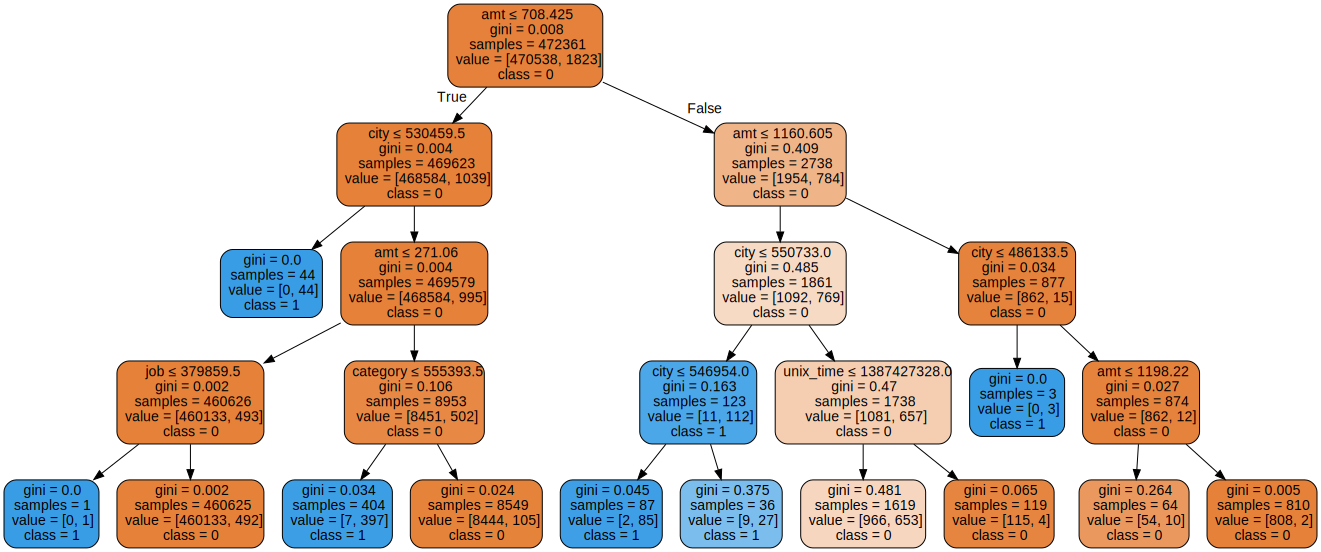

In [106]:
# CREATE THE DECISION TREE
tree = DecisionTreeClassifier(max_depth=4)
#train the classifier
tree.fit(x_train,y_train)

# visualize the tree
# plot_tree(tree, feature_names=heart.columns[0:12])

# visualize tree better using graphviz
dot_data = export_graphviz(
    tree,
    out_file=None,
    feature_names=fraud_numeric.columns,
    class_names=['0', '1'],
    rounded=True,
    filled=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

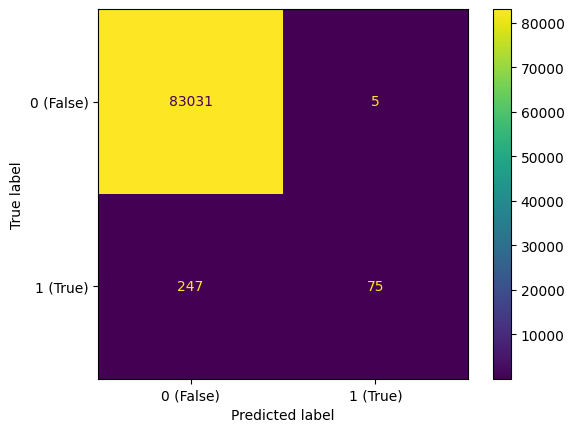

In [107]:
# create confusion matrix for decision tree above using sklearn
# start by making predictions using the x test set
treePredictions = tree.predict(x_test)

# create confusion matrix using test and predicted
treeConfusion = confusion_matrix(y_test, treePredictions)
# print(treeConfusion) -- prints bare confusion matrix

# use metrics.ConfusionMatrixDisplay function to create labeled display
treeConfusion = metrics.ConfusionMatrixDisplay(confusion_matrix = treeConfusion, display_labels = ['0 (False)', '1 (True)'])
treeConfusion.plot()
plt.show()

In [108]:
# calculate metrics
# accuracy using accuracy method in metrics
treeAccuracy = metrics.accuracy_score(y_test, treePredictions)

# precision using method in metrics
treePrecision = metrics.precision_score(y_test, treePredictions)

# recall using method in metrics
treeRecall = metrics.recall_score(y_test, treePredictions)

# f-measure using method in metrics
treeFmeasure = metrics.f1_score(y_test, treePredictions)

# create table of metrics using pandas dataframes and display
treeMetricsTable = pd.DataFrame({
    'Accuracy': [treeAccuracy],
    'Precision': [treePrecision],
    'Recall': [treeRecall],
    'F1 score': [treeFmeasure],
})
print("Metrics for Decision Tree Classifier: \n", treeMetricsTable)

Metrics for Decision Tree Classifier: 
    Accuracy  Precision    Recall  F1 score
0  0.996977     0.9375  0.232919  0.373134


In [109]:
# CREATE K-NEAREST NEIGHBORS
# check accuracies of different k values for knn
# for k in range(1,20):
#   neighborsTests = KNeighborsClassifier(n_neighbors=k)

#   neighborsTests.fit(x_train, y_train)
#   knnTestPredictions = neighborsTests.predict(x_test)

#   print(f"{k=} :{metrics.accuracy_score(y_test, knnTestPredictions)}")

# k=10 gives best accuracy so we will use this for our k value
# create new knn model using same process as above
neighbors = KNeighborsClassifier(n_neighbors=10)

neighbors.fit(x_train, y_train)
knnPredictions = neighbors.predict(x_test)

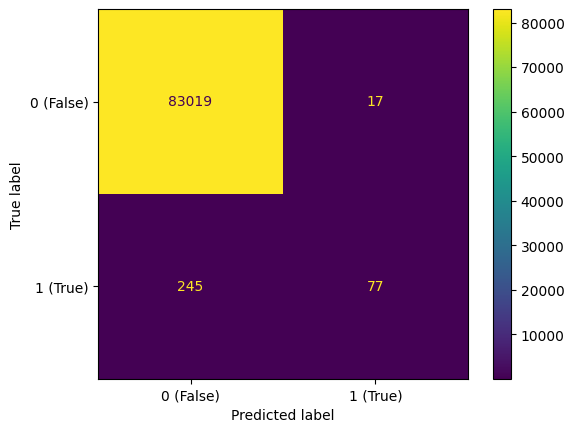

In [110]:
# create confusion matrix for KNN using test and predicted
knnConfusion = confusion_matrix(y_test, knnPredictions)

# use metrics.ConfusionMatrixDisplay function to create labeled display
knnConfusion = metrics.ConfusionMatrixDisplay(confusion_matrix = knnConfusion, display_labels = ['0 (False)', '1 (True)'])
knnConfusion.plot()
plt.show()

In [111]:
# calculate metrics
# accuracy using accuracy method in metrics
knnAccuracy = metrics.accuracy_score(y_test, knnPredictions)

# precision using method in metrics
knnPrecision = metrics.precision_score(y_test, knnPredictions)

# recall using method in metrics
knnRecall = metrics.recall_score(y_test, knnPredictions)

# f-measure using method in metrics
knnFmeasure = metrics.f1_score(y_test, knnPredictions)

# create table of metrics using pandas dataframes and display
knnMetricsTable = pd.DataFrame({
    'Accuracy': [knnAccuracy],
    'Precision': [knnPrecision],
    'Recall': [knnRecall],
    'F1 score': [knnFmeasure],
})
print("Metrics for KNN Classifier: \n", knnMetricsTable)

Metrics for KNN Classifier: 
    Accuracy  Precision   Recall  F1 score
0  0.996857   0.819149  0.23913  0.370192


In [112]:
# CREATE RANDOM FOREST 
# check accuracies of different numbers of trees
# for k in range(1,100):
#   forestTests = RandomForestClassifier(n_estimators=k)

#   forestTests.fit(x_train, y_train)
#   forestTestPredictions = forestTests.predict(x_test)

#   print(f"{k=} :{metrics.accuracy_score(y_test, forestTestPredictions)}")

forest = RandomForestClassifier(n_estimators=50)
# fit the model with training data
forest.fit(x_train, y_train)
# predict 
forestPredictions = forest.predict(x_test)

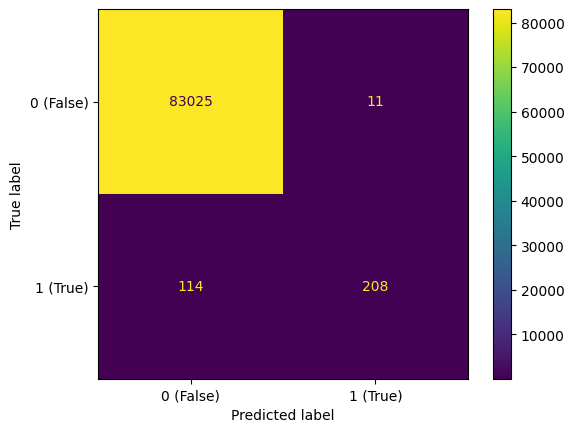

In [113]:
# create confusion matrix for random forest using test and predicted
forestConfusion = confusion_matrix(y_test, forestPredictions)

# use metrics.ConfusionMatrixDisplay function to create labeled display
forestConfusion = metrics.ConfusionMatrixDisplay(confusion_matrix = forestConfusion, display_labels = ['0 (False)', '1 (True)'])
forestConfusion.plot()
plt.show()

In [114]:
# calculate metrics
# accuracy using accuracy method in metrics
forestAccuracy = metrics.accuracy_score(y_test, forestPredictions)

# precision using method in metrics
forestPrecision = metrics.precision_score(y_test, forestPredictions)

# recall using method in metrics
forestRecall = metrics.recall_score(y_test, forestPredictions)

# f-measure using method in metrics
forestFmeasure = metrics.f1_score(y_test, forestPredictions)

# create table of metrics using pandas dataframes and display
forestMetricsTable = pd.DataFrame({
    'Accuracy': [forestAccuracy],
    'Precision': [forestPrecision],
    'Recall': [forestRecall],
    'F1 score': [forestFmeasure],
})
print("Metrics for Random Forest Classifier: \n", forestMetricsTable)

Metrics for Random Forest Classifier: 
    Accuracy  Precision    Recall  F1 score
0    0.9985   0.949772  0.645963  0.768946


In [115]:
# LOGISTIC REGRESSION

# create logistic regression model
logRegModel = LogisticRegression(solver='saga')

# fit the model with training data
logRegModel.fit(x_train, y_train)

# predict
logRegPredictions = logRegModel.predict(x_test)

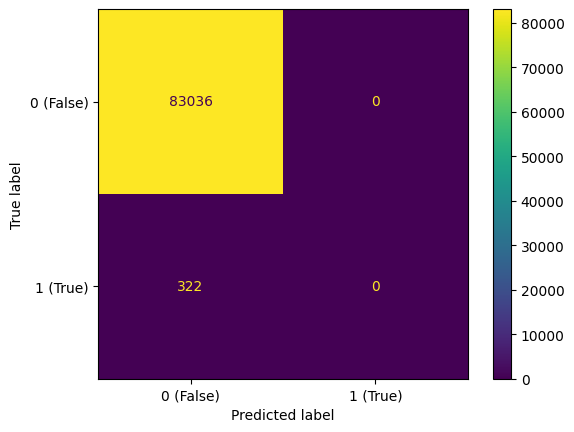

In [116]:
# create confusion matrix for random forest using test and predicted
logRegConfusion = confusion_matrix(y_test, logRegPredictions)

# use metrics.ConfusionMatrixDisplay function to create labeled display
logRegConfusion = metrics.ConfusionMatrixDisplay(confusion_matrix = logRegConfusion, display_labels = ['0 (False)', '1 (True)'])
logRegConfusion.plot()
plt.show()

In [117]:
# calculate metrics
# accuracy using accuracy method in metrics
logRegAccuracy = metrics.accuracy_score(y_test, logRegPredictions)

# precision using method in metrics
logRegPrecision = metrics.precision_score(y_test, logRegPredictions)

# recall using method in metrics
logRegRecall = metrics.recall_score(y_test, logRegPredictions)

# f-measure using method in metrics
logRegFmeasure = metrics.f1_score(y_test, logRegPredictions)

# create table of metrics using pandas dataframes and display
logRegMetricsTable = pd.DataFrame({
    'Accuracy': [logRegAccuracy],
    'Precision': [logRegPrecision],
    'Recall': [logRegRecall],
    'F1 score': [logRegFmeasure],
})
print("Metrics for Logistic Regression Classifier: \n", logRegMetricsTable)

Metrics for Logistic Regression Classifier: 
    Accuracy  Precision  Recall  F1 score
0  0.996137        0.0     0.0       0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [147]:
# create metrics table for all classifiers
metricsTable = pd.DataFrame({
    'Accuracy': [knnAccuracy, treeAccuracy, forestAccuracy, logRegAccuracy],
    'Precision': [knnPrecision, treePrecision, forestPrecision, logRegPrecision],
    'Recall': [knnRecall, treeRecall, forestRecall, logRegRecall],
    'F1 score': [knnFmeasure, treeFmeasure, forestFmeasure, logRegFmeasure],
}, index=['k-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Logistic Regression'])
print("Metrics for all classifiers: \n", metricsTable)

Metrics for all classifiers: 
                      Accuracy  Precision    Recall  F1 score
k-Nearest Neighbors  0.996857   0.819149  0.239130  0.370192
Decision Tree        0.996977   0.937500  0.232919  0.373134
Random Forest        0.998500   0.949772  0.645963  0.768946
Logistic Regression  0.996137   0.000000  0.000000  0.000000


Feature Importances:
cc_num : 0.025368909798041205
merchant : 0.05741738786183503
category : 0.14588822719959563
amt : 0.34737613670997924
gender : 0.007176689006644616
city : 0.0678172043654945
state : 0.015865407513717997
zip : 0.022665802622014435
lat : 0.020323464660109192
long : 0.021460177435329676
city_pop : 0.02758517686416678
job : 0.03137011695248979
dob : 0.04060019345203968
unix_time : 0.07037787553530932
merch_lat : 0.04881417911816967
merch_long : 0.04989305090506327


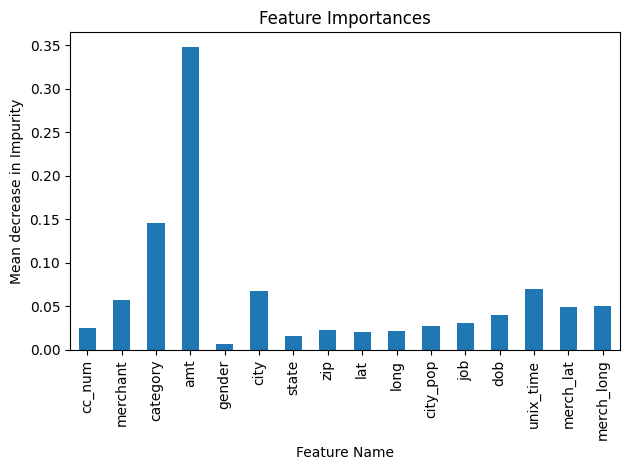

In [119]:
# FEATURE IMPORTANCE
# use feature importances method from random forest library
importanceValues = forest.feature_importances_

featureNames = fraud_numeric.columns

print("Feature Importances:")
for i in range(len(importanceValues)):
  print(featureNames[i], ":", importanceValues[i])
# print(importanceValues)

forest_importances = pd.Series(importanceValues, index=featureNames)

fig, ax = plt.subplots()
importancePlot = forest_importances.plot.bar(ax=ax)
ax.set_title("Feature Importances")
ax.set_xlabel("Feature Name")
ax.set_ylabel("Mean decrease in Impurity")
fig.tight_layout()


# CAN ALSO FIND FEATURE IMPORTANCE USING FOLLOWING
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# from sklearn.feature_selection import chi2
# from sklearn.preprocessing import MinMaxScaler


# X = x_train
# y = y_train

# # Select the top 10 most important features using chi-squared test
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# selector = SelectKBest(score_func=f_classif, k=6)
# X_new = selector.fit_transform(X_scaled, y)

# # Get the indices of the selected features
# idxs_selected = selector.get_support(indices=True)

# # Get the names of the selected features
# features_selected = X.columns[idxs_selected].tolist()

# # Print the selected feature names
# print(features_selected)


In [120]:
# SUBSET THE DATA USING MOST IMPORTANT FEATURES
# use top 5 features and target variable
subsetFraud = fraud[['amt','category','city','unix_time','merchant']]

print(subsetFraud.info())

# split into data and target
x2, y2 = subsetFraud, fraud[fraud.columns[22]]

# create train/test split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.15, random_state = 42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   amt        555719 non-null  float64
 1   category   555719 non-null  int64  
 2   city       555719 non-null  int64  
 3   unix_time  555719 non-null  int64  
 4   merchant   555719 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 21.2 MB
None


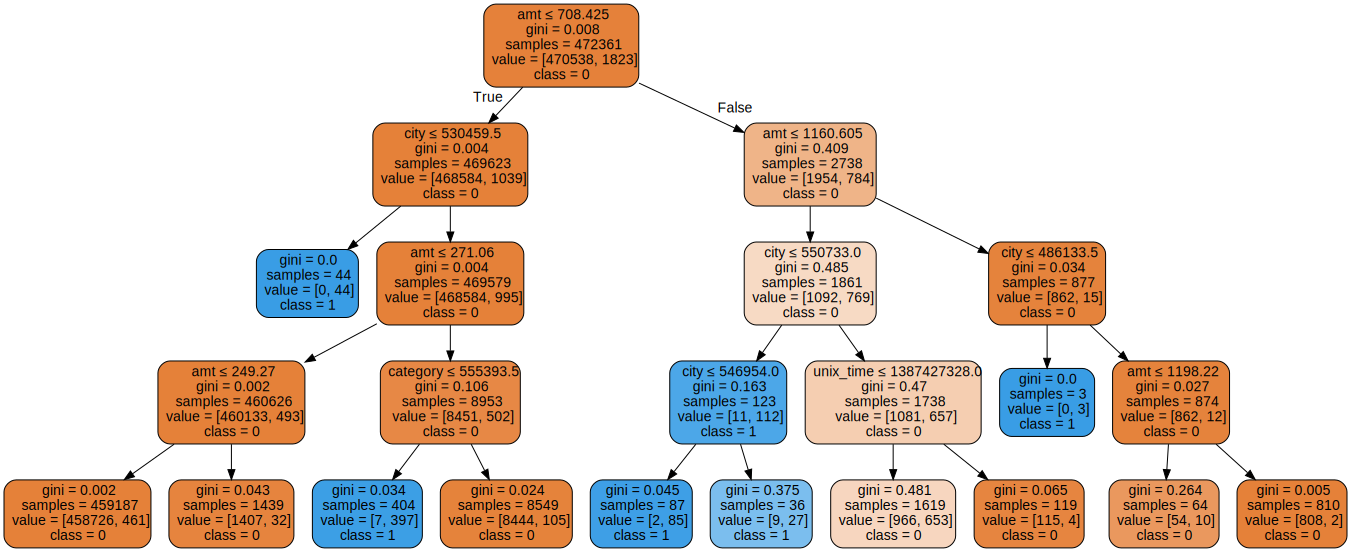

In [123]:
# NEW DECISION TREE
tree2 = DecisionTreeClassifier(max_depth=4)
#train the classifier
tree2.fit(x_train2,y_train2)

# visualize tree using graphviz
dot_data = export_graphviz(
    tree2,
    out_file=None,
    feature_names=x2.columns,
    class_names=['0', '1'],
    rounded=True,
    filled=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

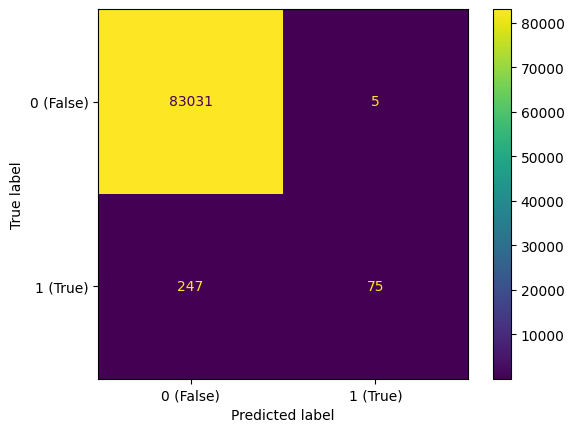

In [124]:
# create confusion matrix for decision tree above using sklearn
# start by making predictions using the x test set
treePredictions2 = tree2.predict(x_test2)

# create confusion matrix using test and predicted
treeConfusion = confusion_matrix(y_test2, treePredictions2)
# print(treeConfusion) -- prints bare confusion matrix

# use metrics.ConfusionMatrixDisplay function to create labeled display
treeConfusion = metrics.ConfusionMatrixDisplay(confusion_matrix = treeConfusion, display_labels = ['0 (False)', '1 (True)'])
treeConfusion.plot()
plt.show()

In [125]:
# calculate metrics
# accuracy using accuracy method in metrics
treeAccuracy2 = metrics.accuracy_score(y_test2, treePredictions2)

# precision using method in metrics
treePrecision2 = metrics.precision_score(y_test2, treePredictions2)

# recall using method in metrics
treeRecall2 = metrics.recall_score(y_test2, treePredictions2)

# f-measure using method in metrics
treeFmeasure2 = metrics.f1_score(y_test2, treePredictions2)

# create table of metrics using pandas dataframes and display
treeMetricsTable2 = pd.DataFrame({
    'Accuracy': [treeAccuracy2],
    'Precision': [treePrecision2],
    'Recall': [treeRecall2],
    'F1 score': [treeFmeasure2],
})
print("Metrics for New Decision Tree Classifier: \n", treeMetricsTable2)

Metrics for New Decision Tree Classifier: 
    Accuracy  Precision    Recall  F1 score
0  0.996977     0.9375  0.232919  0.373134


In [126]:
# CREATE K-NEAREST NEIGHBORS
# check accuracies of different k values for knn
# for k in range(1,20):
#   neighborsTests = KNeighborsClassifier(n_neighbors=k)

#   neighborsTests.fit(x_train, y_train)
#   knnTestPredictions = neighborsTests.predict(x_test)

#   print(f"{k=} :{metrics.accuracy_score(y_test, knnTestPredictions)}")

# k=10 gives best accuracy so we will use this for our k value
# create new knn model using same process as above
neighbors2 = KNeighborsClassifier(n_neighbors=10)

neighbors2.fit(x_train2, y_train2)
knnPredictions2 = neighbors2.predict(x_test2)

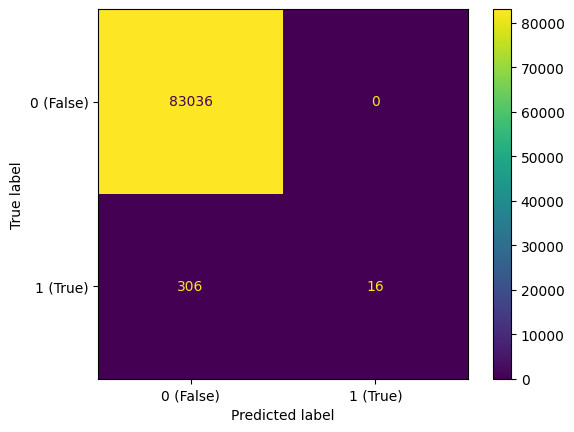

In [127]:
# create confusion matrix for KNN using test and predicted
knnConfusion = confusion_matrix(y_test2, knnPredictions2)

# use metrics.ConfusionMatrixDisplay function to create labeled display
knnConfusion = metrics.ConfusionMatrixDisplay(confusion_matrix = knnConfusion, display_labels = ['0 (False)', '1 (True)'])
knnConfusion.plot()
plt.show()

In [128]:
# calculate metrics
# accuracy using accuracy method in metrics
knnAccuracy2 = metrics.accuracy_score(y_test2, knnPredictions2)

# precision using method in metrics
knnPrecision2 = metrics.precision_score(y_test2, knnPredictions2)

# recall using method in metrics
knnRecall2 = metrics.recall_score(y_test2, knnPredictions2)

# f-measure using method in metrics
knnFmeasure2 = metrics.f1_score(y_test2, knnPredictions2)

# create table of metrics using pandas dataframes and display
knnMetricsTable2 = pd.DataFrame({
    'Accuracy': [knnAccuracy2],
    'Precision': [knnPrecision2],
    'Recall': [knnRecall2],
    'F1 score': [knnFmeasure2],
})
print("Metrics for New KNN Classifier: \n", knnMetricsTable2)

Metrics for New KNN Classifier: 
    Accuracy  Precision    Recall  F1 score
0  0.996329        1.0  0.049689  0.094675


In [129]:
# CREATE RANDOM FOREST 
# check accuracies of different numbers of trees
# for k in range(1,100):
#   forestTests = RandomForestClassifier(n_estimators=k)

#   forestTests.fit(x_train, y_train)
#   forestTestPredictions = forestTests.predict(x_test)

#   print(f"{k=} :{metrics.accuracy_score(y_test, forestTestPredictions)}")

forest2 = RandomForestClassifier(n_estimators=50)
# fit the model with training data
forest2.fit(x_train2, y_train2)
# predict 
forestPredictions2 = forest2.predict(x_test2)

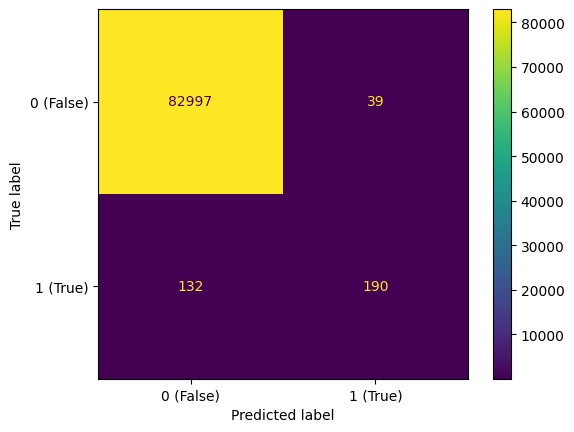

In [130]:
# create confusion matrix for random forest using test and predicted
forestConfusion = confusion_matrix(y_test2, forestPredictions2)

# use metrics.ConfusionMatrixDisplay function to create labeled display
forestConfusion = metrics.ConfusionMatrixDisplay(confusion_matrix = forestConfusion, display_labels = ['0 (False)', '1 (True)'])
forestConfusion.plot()
plt.show()

In [131]:
# calculate metrics
# accuracy using accuracy method in metrics
forestAccuracy2 = metrics.accuracy_score(y_test2, forestPredictions2)

# precision using method in metrics
forestPrecision2 = metrics.precision_score(y_test2, forestPredictions2)

# recall using method in metrics
forestRecall2 = metrics.recall_score(y_test2, forestPredictions2)

# f-measure using method in metrics
forestFmeasure2 = metrics.f1_score(y_test2, forestPredictions2)

# create table of metrics using pandas dataframes and display
forestMetricsTable2 = pd.DataFrame({
    'Accuracy': [forestAccuracy2],
    'Precision': [forestPrecision2],
    'Recall': [forestRecall2],
    'F1 score': [forestFmeasure2],
})
print("Metrics for New Random Forest Classifier: \n", forestMetricsTable2)

Metrics for New Random Forest Classifier: 
    Accuracy  Precision    Recall  F1 score
0  0.997949   0.829694  0.590062  0.689655


In [132]:
# LOGISTIC REGRESSION

# create logistic regression model
logRegModel2 = LogisticRegression(solver='saga')

# fit the model with training data
logRegModel2.fit(x_train2, y_train2)

# predict
logRegPredictions2 = logRegModel2.predict(x_test2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


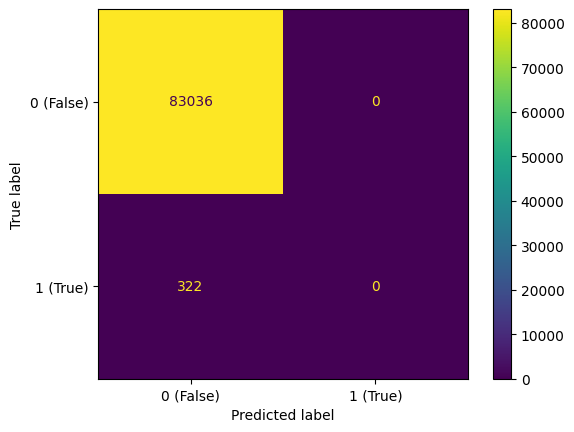

In [133]:
# create confusion matrix for random forest using test and predicted
logRegConfusion = confusion_matrix(y_test2, logRegPredictions2)

# use metrics.ConfusionMatrixDisplay function to create labeled display
logRegConfusion = metrics.ConfusionMatrixDisplay(confusion_matrix = logRegConfusion, display_labels = ['0 (False)', '1 (True)'])
logRegConfusion.plot()
plt.show()

In [134]:
# calculate metrics
# accuracy using accuracy method in metrics
logRegAccuracy2 = metrics.accuracy_score(y_test2, logRegPredictions2)

# precision using method in metrics
logRegPrecision2 = metrics.precision_score(y_test2, logRegPredictions2)

# recall using method in metrics
logRegRecall2 = metrics.recall_score(y_test2, logRegPredictions2)

# f-measure using method in metrics
logRegFmeasure2 = metrics.f1_score(y_test2, logRegPredictions2)

# create table of metrics using pandas dataframes and display
logRegMetricsTable2 = pd.DataFrame({
    'Accuracy': [logRegAccuracy2],
    'Precision': [logRegPrecision2],
    'Recall': [logRegRecall2],
    'F1 score': [logRegFmeasure2],
})
print("Metrics for New Logistic Regression Classifier: \n", logRegMetricsTable2)

Metrics for New Logistic Regression Classifier: 
    Accuracy  Precision  Recall  F1 score
0  0.996137        0.0     0.0       0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [136]:
# create metrics table for all classifiers including new
metricsTable2 = pd.DataFrame({
    'Accuracy': [knnAccuracy, treeAccuracy, forestAccuracy, logRegAccuracy, knnAccuracy2, treeAccuracy2, forestAccuracy2, logRegAccuracy2],
    'Precision': [knnPrecision, treePrecision, forestPrecision, logRegPrecision, knnPrecision2, treePrecision2, forestPrecision2, logRegPrecision2],
    'Recall': [knnRecall, treeRecall, forestRecall, logRegRecall, knnRecall2, treeRecall2, forestRecall2, logRegRecall2],
    'F1 score': [knnFmeasure, treeFmeasure, forestFmeasure, logRegFmeasure, knnFmeasure2, treeFmeasure2, forestFmeasure2, logRegFmeasure2],
}, index=['k-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'New k-Nearest Neighbors', 'New Decision Tree', 'New Random Forest', 'New Logistic Regression'])
print("Metrics for all classifiers: \n", metricsTable2)

Metrics for all classifiers: 
                          Accuracy  Precision    Recall  F1 score
k-Nearest Neighbors      0.996857   0.819149  0.239130  0.370192
Decision Tree            0.996977   0.937500  0.232919  0.373134
Random Forest            0.998500   0.949772  0.645963  0.768946
Logistic Regression      0.996137   0.000000  0.000000  0.000000
New k-Nearest Neighbors  0.996329   1.000000  0.049689  0.094675
New Decision Tree        0.996977   0.937500  0.232919  0.373134
New Random Forest        0.997949   0.829694  0.590062  0.689655
New Logistic Regression  0.996137   0.000000  0.000000  0.000000
